In [ ]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from heapq import nlargest
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re, string
import math

In [ ]:
# Criando Sentenças
sentenca = []
with open('3student.txt') as file_data:
  for i in file_data:
    sentenca.append( sent_tokenize(i) )

# Colocando em minúsculo
lower = [ j.lower() for i in sentenca for j in i ]

# Fazendo limpeza
clean = []
for i in lower:
    alpha = re.sub( r'[0-9]+', '', i )
    clean.append( alpha.translate( str.maketrans( '', '', string.punctuation ) ).strip() )

# Tokenização
tokenized = [ x for x in [ word_tokenize(i) for i in clean ] if x != [] ]

# Juntando lista de palavras
chain = list(chain(*tokenized))

# Retirando as Stopwords
stopwords = set(stopwords.words('english'))
no_stopwords = [ i for i in chain if i not in stopwords ]

# Lematização
wnet = WordNetLemmatizer()
lem = [ wnet.lemmatize(lyr) for lyr in no_stopwords ]

['earth', 'dreamland', 'bb', 'text', 'file', 'junky', 'rpgnet', 'gm', 'file', 'archive', 'site', 'adventure', 'three', 'student', 'year', 'combination', 'event', 'need', 'enter', 'caused', 'mr', 'sherlock', 'holmes', 'spend', 'week', 'one', 'great', 'university', 'town', 'time', 'small', 'instructive', 'adventure', 'relate', 'befell', 'u', 'obvious', 'detail', 'would', 'help', 'reader', 'exactly', 'identify', 'college', 'criminal', 'would', 'injudicious', 'offensive', 'painful', 'scan', 'dal', 'may', 'well', 'allowed', 'die', 'due', 'discretion', 'incident', 'may', 'however', 'described', 'since', 'serf', 'illustrate', 'quality', 'friend', 'markable', 'endeavour', 'statement', 'avoid', 'term', 'would', 'serve', 'limit', 'event', 'particular', 'place', 'give', 'clue', 'people', 'concerned', 'residing', 'time', 'furnished', 'lodging', 'close', 'library', 'sherlock', 'holmes', 'pursuing', 'laborious', 'research', 'early', 'english', 'charter', 'research', 'led', 'result', 'striking', 'may

In [ ]:
# Criando listas simulando 3 documentos
lista_dividida = np.array_split(lem, 3)

In [ ]:
for i in lista_dividida:
  print(i)

['earth' 'dreamland' 'bb' 'text' 'file' 'junky' 'rpgnet' 'gm' 'file'
 'archive' 'site' 'adventure' 'three' 'student' 'year' 'combination'
 'event' 'need' 'enter' 'caused' 'mr' 'sherlock' 'holmes' 'spend' 'week'
 'one' 'great' 'university' 'town' 'time' 'small' 'instructive'
 'adventure' 'relate' 'befell' 'u' 'obvious' 'detail' 'would' 'help'
 'reader' 'exactly' 'identify' 'college' 'criminal' 'would' 'injudicious'
 'offensive' 'painful' 'scan' 'dal' 'may' 'well' 'allowed' 'die' 'due'
 'discretion' 'incident' 'may' 'however' 'described' 'since' 'serf'
 'illustrate' 'quality' 'friend' 'markable' 'endeavour' 'statement'
 'avoid' 'term' 'would' 'serve' 'limit' 'event' 'particular' 'place'
 'give' 'clue' 'people' 'concerned' 'residing' 'time' 'furnished'
 'lodging' 'close' 'library' 'sherlock' 'holmes' 'pursuing' 'laborious'
 'research' 'early' 'english' 'charter' 'research' 'led' 'result'
 'striking' 'may' 'subject' 'one' 'future' 'narrative' 'one' 'evening'
 'received' 'visit' 'acquaintan

In [ ]:
# IDF
temp, lis = {}, []
for i in set(lem):
  for k in range(len(lista_dividida)):
    if i in lista_dividida[k]:
      lis.append(i)
      temp[i] = len(lis)
  lis.clear()

idf = {}
for i, j in temp.items():
  idf[i] = math.log10(len(lista_dividida)/float(j))

In [ ]:
# Criando DataFrame de TF, DF, IDF e TF-IDF
df_raw = pd.DataFrame(lem, columns=['words'])
df = df_raw.value_counts(normalize=True).rename_axis('words').reset_index(name='tf')
df_df = df_raw.value_counts().rename_axis('words').reset_index(name='df')
df = df.merge(df_df, how='left', left_on='words', right_on='words')
df_idf = pd.DataFrame(idf.items(), columns = ['words', 'idf'])
df = df.merge(df_idf, how='left', left_on='words', right_on='words')
df['tf-idf'] = df.idf * df.tf
df.head(100)

,words,tf,df,idf,tf-idf
0,holmes,0.016399,49,0.000000,0.000000
1,one,0.015730,47,0.000000,0.000000
2,mr,0.012383,37,0.000000,0.000000
3,said,0.012048,36,0.000000,0.000000
4,sir,0.011714,35,0.000000,0.000000
...,...,...,...,...,...
95,quite,0.001673,5,0.000000,0.000000
96,thought,0.001673,5,0.000000,0.000000
97,please,0.001673,5,0.176091,0.000295
98,like,0.001673,5,0.176091,0.000295


In [135]:
dicionario = {
  'brincar': ['feliz', 'escada', 'policia', 'mundo', 'parede', 'feliz'],
  'correr': ['rua', 'parque', 'escada', 'noiva', 'aliança', 'mãe'],
  'chutar': ['ladrao', 'parede', 'irmao', 'mundo', 'parque', 'feliz'],
  'amar': ['noiva', 'esposa', 'parque', 'policia', 'esposa', 'rua'],
  'gostar': ['noiva', 'esposa', 'irmao', 'mundo', 'parede', 'porta'],
  'destruir': ['mundo', 'parede', 'porta', 'noiva', 'aliança', 'mãe'],
  'noivar': ['noiva', 'aliança', 'mãe', 'mundo', 'parque', 'feliz'],
  'matar': ['policia', 'ladrao', 'bandido', 'noiva', 'aliança', 'mãe'],
  'cair': ['rua', 'porta', 'escada', 'mundo', 'parque', 'feliz'],
  'morrer': ['policia', 'esposa', 'rua', 'mundo', 'parque', 'feliz'],
  'viver': ['mundo', 'parque', 'feliz', 'noiva', 'aliança', 'mãe'],
  'anoitecer' : ['rua', 'parque', 'irmao', 'mundo', 'parede', 'porta']
}

# TF-IDF
tamanho = {
    'brincar': 0.90,
    'correr': 0.75,
    'chutar': 0.60,
    'amar': 0.45,
    'gostar': 0.30,
    'destruir': 0.11,
    'noivar': 0.10,
    'matar': 0.09,
    'cair': 0.08,
    'morrer': 0.07,
    'viver': 0.06,
    'anoitecer' : 0.05
}

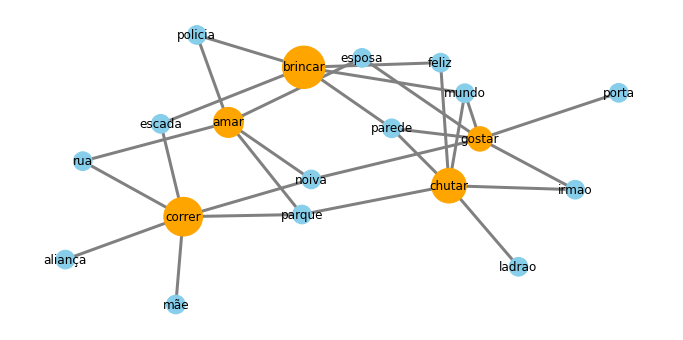

In [137]:
# Segundo questão tem que pegar 5 maiores TF-IDF para servir de Words
words = nlargest( 5, tamanho, key = tamanho.get )
edges = [ (i, j[k]) for i, j in dicionario.items() if i in words for k in range(len(j)) ]

# Setando a variável do gráfico
plt.subplots(figsize=(12,6))
G = nx.Graph()

# Nodes and Edges
G.add_nodes_from( words )
G.add_edges_from( edges )

# Criando node_color e node_size personalizados nos dados
node_color = [ 'orange' if i in words else 'skyblue' for i in G ]
node_size = [ int(tamanho[node]*2000) if node in words else 350 for node in G ]

# Construindo Gráfico:
nx.draw_kamada_kawai( G, with_labels=True, width=3, node_size=node_size, node_color=node_color, edge_color="gray", style="solid" )
plt.show()